## TOC:
* [Загрузка данных, анализ пропусков](#1-bullet)
* [Предварительная обработка и визуалия](#2-bullet)
* [Отбор признаков](#3-bullet)

In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', 500)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

## Загрузка данных, анализ пропусков <a class="anchor" id="1-bullet"></a>

In [153]:
df=pd.read_csv(r'C:\Users\Администратор\Desktop\REAskills2021\train.csv')
df=df.drop('Unnamed: 0', axis=1)

Код для выявления колонок с пропусками по убыванию.

In [154]:
list_val=[1241 for x in range(88)]
list_percentage=[]
nans=df.isna().sum().tolist()
for i in range(len(nans)):
    list_percentage.append(nans[i]/list_val[i]*100)
df_perc=pd.DataFrame([list_percentage,list(df.columns.values),df.dtypes.values.tolist()])    
df_perc=df_perc.T.rename(columns={0: "percents", 1: "cols",2:'dtype'})
df_perc.sort_values(by=['percents'],ascending=False)

,percents,cols,dtype
71,99.516519,PoolQC,object
73,96.293312,MiscFeature,object
5,93.634166,Alley,object
72,80.821918,Fence,object
80,75.664786,LotAreaAdditional,float64
81,74.617244,YearReconstruction,float64
83,74.375504,Variable01,float64
82,50.04029,3rdFlrSF,float64
84,48.992748,Variable02,float64
56,46.978243,FireplaceQu,object


Имея около 20 переменных с пропусками, имеет смысл ознакомиться с их физическим смыслом и распределением у некоторых из них.
В основной массе, пропуски в этих переменных находятся именно там, где и в физическом мире этих параметров у объекта нет.
Т.е. нет забора, бассейна и т.д. Такие пропуски заполняются специальными символами:
    

In [155]:
# касается переменных типа 'object'
def most_common(lst):
    return max(set(lst), key=lst.count)
def na_handler(df):
    df['PoolQC']=df['PoolQC'].fillna('No Pool')
    df['MiscFeature']=df['MiscFeature'].fillna('noAdd')
    df['Alley']=df['Alley'].fillna('NoAccess')
    df['Fence']=df['Fence'].fillna('NoFence')
    df['FireplaceQu']=df['FireplaceQu'].fillna('NoFireplace')
    df['GarageCond']=df['GarageCond'].fillna('noG')
    df['BsmtExposure']=df['BsmtExposure'].fillna('NoB')
    df['MasVnrType']=df['MasVnrType'].fillna('noM')
    df['Electrical']=df['Electrical'].fillna(most_common(df['Electrical'].tolist()))
    return df
df=na_handler(df)

Далее обрабатывались переменные типа float. Была построена корреляционная матрица, чтобы можно было определить, стоит ли восстанавливать их или лучше отказаться от переменных с большим количеством пропусков.


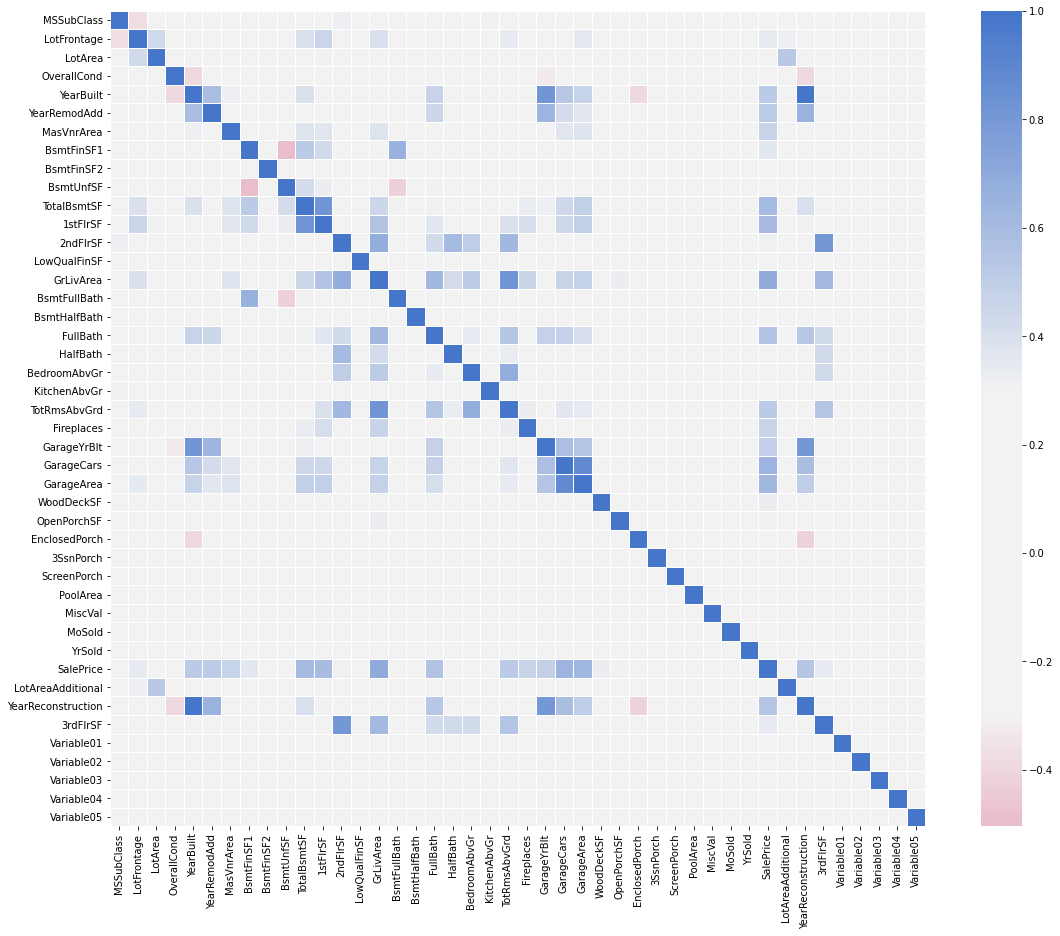

In [156]:
corr_mat = df.corr()
cmap = sns.diverging_palette(0,255,sep=77, as_cmap=True)
plt.subplots(figsize=(20,15))

sns.heatmap(corr_mat, cmap=cmap, center=0,
            square=True, linewidths=0.5)
plt.show()


Видно, что переменные Variables1-5 ни с чем не коррелируют вообще,не говоря о SalePrice. Мы избавляемся от них. 
Несмотря на небольшую корреляцию с целевым признаком, переменная 3rdFlrSF имеет более 50% пропусков. И, в отличае, от перменной 2rdFlrSF пропуски не означают, что 3-го этажа нет. Данные пропущены, поэтому мы избавляемся от этой колонки тоже.
Оставшиеся float так же обработаны в соответствии с их физическими значениями.

In [157]:
def float_handle(dff):
    dff['LotAreaAdditional']=dff['LotAreaAdditional'].fillna(0)
    dff=dff.drop('YearReconstruction',axis=1)
    dff=dff.drop('Variable01',axis=1)
    dff=dff.drop('Variable02',axis=1)
    dff=dff.drop('Variable03',axis=1)
    dff=dff.drop('Variable04',axis=1)
    dff=dff.drop('Variable05',axis=1)
    dff=dff.drop('3rdFlrSF',axis=1)
    dff['LotFrontage']=dff['LotFrontage'].fillna(dff['LotFrontage'].mean())
    dff['GarageYrBlt']=dff['GarageYrBlt'].fillna(min(dff['GarageYrBlt']))
    dff['MasVnrArea']=dff['MasVnrArea'].fillna(0)
    return dff
df=float_handle(df)

Все колонки, в которых значения обозначают года, были приведены к виду возраста. Их значения были вычтены из 2010, так как 2010 - максимальный год в датасете.

Также, обознакчим переменные MoSold и MSSubClass как категориальные, так как они представляют из себя категории, не смотря на то, что обозначаются числами.

In [158]:
def years_to_age(dff):
    dff['YrSold']=dff['YrSold'].apply(lambda x: 2010-x)

    dff['YearBuilt']=dff['YearBuilt'].apply(lambda x: 2010-x)
    dff['YearRemodAdd']=dff['YearRemodAdd'].apply(lambda x: 2010-x)
    dff['GarageYrBlt']=dff['GarageYrBlt'].apply(lambda x: 2010-x)
    return dff
def obj_handle(df):
    for col in ['MSSubClass',  'MoSold']:
        df[col] = df[col].astype(object)
    return df
df=years_to_age(df)
df=obj_handle(df)

Оставшиеся переменные с типами nan имеют ктаегориальный характер, где nan - означает отсутствие. К ним будут пременены Энкодеры, после чего Nan-ов в массиве не останется. Осталась только переменная OverallQual. 

Это важная переменная по физическому смыслу. Её необходимо восстановить как можно качетсвеннее. Для этого будем использовать алгоритм машинного обучения RandomForest. Однако, в данный момент восставновление невозможно, так как не все переменные предобработаны. Поэтому, будем обрабтывать датасет до финального сострояния без этой переменной, а после предскажем пропущенные значения и добавим к остальным.

In [159]:
# В переменной были помарки в значениях, устраняю их этим кодом и отрезаю колонку от датасета.
df['OverallQual']=df['OverallQual'].astype('str').apply(lambda x: ''.join([i for i in x if i not in '!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~']) )
df['OverallQual']=df['OverallQual'].astype('float')


In [160]:
# Преобразовываем категориальные переменные и удаляем целевую переменную
df_obj=df.select_dtypes(include=['object'])
df_obj=pd.get_dummies(df_obj,drop_first=True)
df_ok=df.select_dtypes(include=['float64','int64'])
df_1=pd.concat([df_ok,df_obj], axis=1)
SalePrice=df_1.pop('SalePrice')
Y=SalePrice.values.tolist()

Массив обработан, может приступить к восставнолению переменной OverallQual

In [161]:
df_1['OverallQual']=popped
df_1['OverallQual']=df_1['OverallQual'].fillna(123)
df2=df_1.loc[df_1['OverallQual']!=123]
df3=df_1.loc[df_1['OverallQual']==123]
y=df2.pop('OverallQual')
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier()
regr.fit(df2, y)
df3.pop('OverallQual')
predictions=regr.predict(df3)
df2['OverallQual']=y
df3['OverallQual']=predictions.tolist()
df_1=pd.concat([df2,df3],axis=0)
df_1.sort_index(inplace=True)

Получили массив df_1 с предобработанными данными, без пропусков.

In [162]:
sum(df_1.isna().sum())

0

## Предварительная обработка данных и визуализация <a class="anchor" id="2-bullet"></a>

Обратим внимание на распределение целевой переменной:

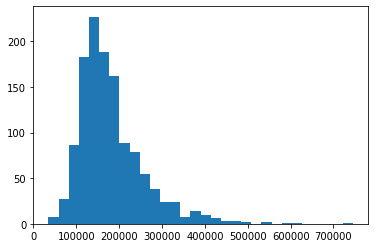

In [163]:
_= plt.hist(Y,bins=30)

Как мы видим, целевая переменная смещена, что может испортить качество предсказания наших моделей, поэтму, прологарифмируем её. 

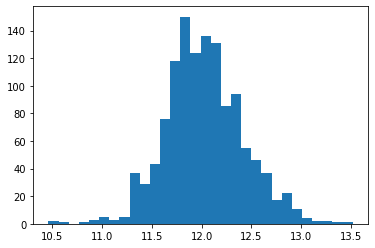

In [164]:
_=plt.hist(np.log(Y),bins=30)

Данное распределение больше похоже на нормальное, поэтому будем работать с логарифмированной целевой переменной.


Далее проверим зависимости наиболее коррелированных с таргетом переменных, чтобы понять нужна ли дополнительная обработка, и какие модели окажутся эффективными.

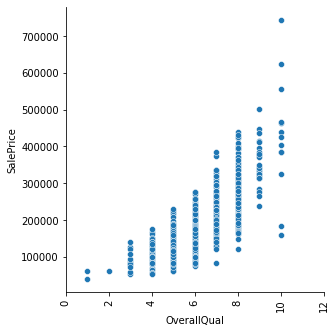

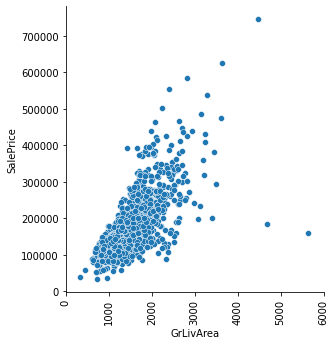

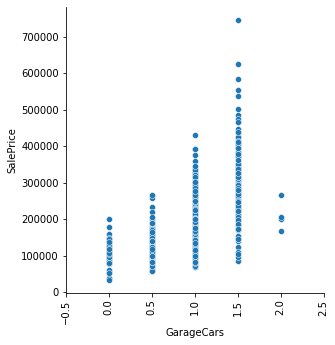

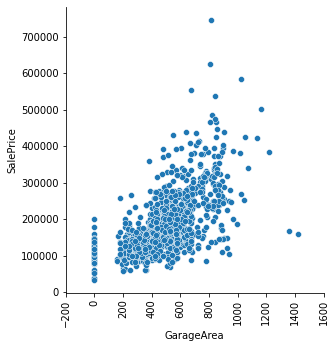

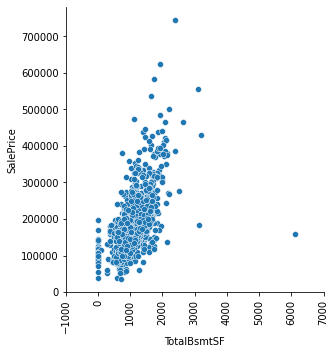

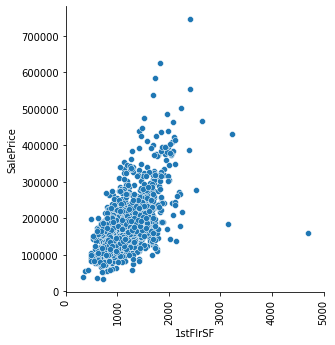

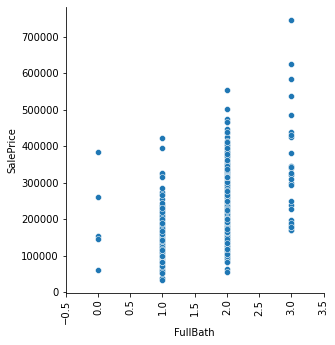

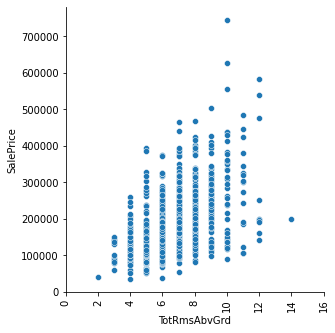

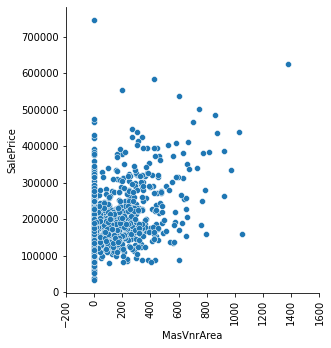

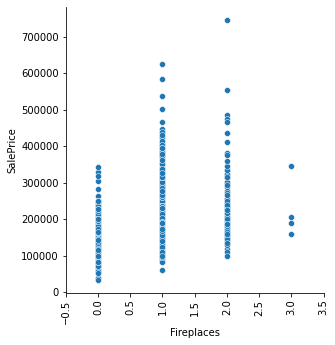

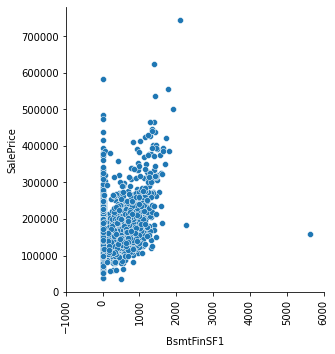

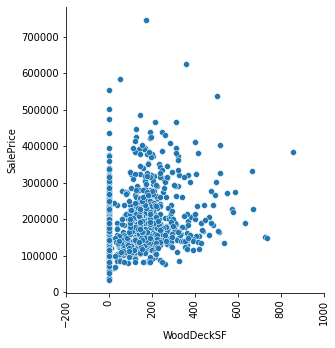

In [165]:
df_1['SalePrice']=Y
corr_mat=df.corr()
mask=corr_mat['SalePrice'].nlargest(13).index.tolist()
for element in mask[1:]:
    re_plot = sns.relplot(y="SalePrice", x= element, legend="full", data=df[mask], height=4.5, aspect=3 / 3,);
    re_plot.set_xticklabels(rotation=90)

Как видим, OverallQual оказывается одной из самых сильнокоррелированных переменных с целевой.

Так же видим большую дисперсию параметров. В основном точки распределены в некотором тренде, но на каждом графике присутствуют так же и выбросы. Это говорит нам о том, что линейные алгоритмы могут быть не очень хороши при решении, так как очень восприимчивы к выбросам. Без хорошей очитски данных от выбросов применять их будет неверно.

Однако, алгоритмы основанные на деревьях решений тут будут как нельзя кстати. Они невосприимчивы к выбросам и могут улавливать нелинейные зависимости.

## Отбор признаков<a class="anchor" id="3-bullet"></a>

Некоторый отбор признаков был произведен в первом Модуле.

Теперь необходимо произвести генерацию прзнаков на основе существующих.
Так как в данных нет информации о полной площади жилья, то можно создать подобный признак из существующих.
Так же можно получить признак, описывающий количество ванных комнат в доме(полных и не полных)
Так же, старый, но обновленный дом, уже не считается на столько старым и его цена должна быть выше. Поэтому можно создать переменную, которая будет содержать среднюю дату постройки дома и его ремонта.

In [168]:
df_1['TotalArea'] = df_1['TotalBsmtSF'] + df_1['1stFlrSF'] + df_1['2ndFlrSF']+  df_1['GrLivArea'] +df_1['GarageArea']
df_1['Bathrooms'] = df_1['FullBath'] + df_1['HalfBath']/2
df_1['Year average']= (df_1['YearRemodAdd']+df_1['YearBuilt'])/2

In [169]:
df_1['FullBath']

0       2
1       1
2       2
3       2
4       1
       ..
1236    2
1237    2
1238    1
1239    1
1240    2
Name: FullBath, Length: 1241, dtype: int64

In [29]:
df.isna().sum()

MSSubClass             0
MSZoning               0
LotFrontage            0
LotArea                0
Street                 0
Alley                  0
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
OverallQual          111
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual              31
BsmtCond              31
BsmtExposure           0
BsmtFinType1          31
BsmtFinSF1             0
BsmtFinType2          31
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0


In [ ]:
def obj_handle(df):
    for col in ['MSSubClass', 'YrSold', 'MoSold']:
        df[col] = df[col].astype(object)
    return df




def most_common(lst):
    return max(set(lst), key=lst.count)
def na_handler(df):
    df['PoolQC']=df['PoolQC'].fillna('No Pool')
    df['MiscFeature']=df['MiscFeature'].fillna('noAdd')
    df['Alley']=df['Alley'].fillna('NoAccess')
    df['Fence']=df['Fence'].fillna('NoFence')
    df['FireplaceQu']=df['FireplaceQu'].fillna('NoFireplace')
    df['GarageCond']=df['GarageCond'].fillna('noG')
    df['BsmtExposure']=df['BsmtExposure'].fillna('NoB')
    df['MasVnrType']=df['MasVnrType'].fillna('noM')
    df['Electrical']=df['Electrical'].fillna(most_common(df['Electrical'].tolist()))
    return df




def float_handle(dff):
    dff['LotAreaAdditional']=dff['LotAreaAdditional'].fillna(0)
    dff=dff.drop('YearReconstruction',axis=1)
    dff=dff.drop('Variable01',axis=1)
    dff=dff.drop('Variable02',axis=1)
    dff=dff.drop('Variable03',axis=1)
    dff=dff.drop('Variable04',axis=1)
    dff=dff.drop('3rdFlrSF',axis=1)
    dff['LotFrontage']=dff['LotFrontage'].fillna(dff['LotFrontage'].mean())
    dff['GarageYrBlt']=dff['GarageYrBlt'].fillna(min(dff['GarageYrBlt']))
    dff['MasVnrArea']=dff['MasVnrArea'].fillna(0)
    return dff
def years_to_age(dff):
    dff['YrSold']=dff['YrSold'].apply(lambda x: 2010-x)

    dff['YearBuilt']=dff['YearBuilt'].apply(lambda x: 2010-x)
    dff['YearRemodAdd']=dff['YearRemodAdd'].apply(lambda x: 2010-x)
    dff['GarageYrBlt']=dff['GarageYrBlt'].apply(lambda x: 2010-x)
    return dff